## <center> LEGMC wind data converter and visualization
    


In this notebook, we are converting raw LEGMC (“Latvian Environment, Geology and Meteorology Centre”) wind  data to a more convenient format and sorting data by Date and Time. Next, we will explore different options for data visualization and provide a brief overview of automating this process.
Raw data available at: https://www.meteo.lv/meteorologija-datu-meklesana/?nid=461

This notebook consists of four steps:

1. Convert raw data<br>
2. Combine converted data<br>
3. Visualize the data<br>
    3.1 Line / scatter plot<br>
    3.2 Vector plot<br>
    3.3 Wind rose<br>
4. Automatic ploting<br>

**1. Convert raw data**

The code reads an Excel file, melts the data, sorts it by date and time, saves the transposed data to a new Excel file, and prints relevant information about the process.

Raw data:
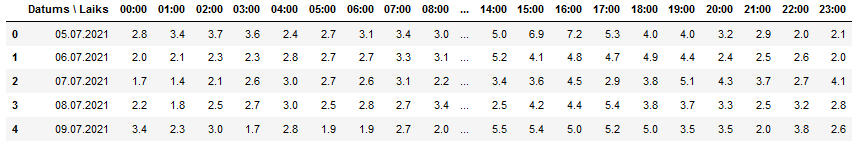

After conversion:
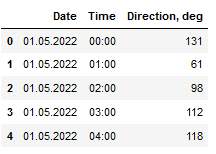

Before using the code, make sure you have specified the correct **file path and name**, whether you use **wind speed ("Speed, m/s") or wind direction ("Direction, deg")** that column name and edit the **location** of the weather station in the file name.

**2. Combine converted data**

The code reads multiple Excel files from a folder (make sure the folder only contains data from one weather station), separates the dataframes based on wind speed and wind direction, merges them based on date and time, creates a combined 'Datetime' column, and exports the merged dataframe to a new Excel file.

**3. Visualization**

Shows three examples of wind visualization using a line/scatter plot, a vector plot, and a wind rose.

**4. Automatic ploting**

This step shows an example of script that automatically creates a line/scatter plot for each month in the given time period from the collected data (step 2) and saves it in the path folder specified in the script.

<p style='text-align: right;'> Author: Miks Papirtis. 2023 </p>


# 1. Convert raw data

In [1]:
import pandas as pd

data = pd.read_excel("C:\\Users\\Miks\\Downloads\\Datu_meklesana(63).xls", skiprows=[0])
data.columns = data.columns.str.strip()  # Remove any leading/trailing whitespace in column names

# Convert the data dictionary to a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to transform columns into rows
melted = df.melt(id_vars='Datums \\ Laiks', var_name='Time', value_name='Direction, deg')

# Rename the 'Datums \ Laiks' column to 'Date'
melted.rename(columns={'Datums \\ Laiks': 'Date'}, inplace=True)

# Sort the DataFrame by 'Date' and 'Time'
melted.sort_values(['Date', 'Time'], inplace=True)

# Reset the index of the DataFrame
melted.reset_index(drop=True, inplace=True)

# Print the transposed DataFrame
print(melted)

# Extract the year from the 'Date' column
year = pd.to_datetime(melted['Date']).dt.year.unique()[0]

file_path = r'C:\Users\Miks\Dropbox\Māra dati\LVĢMC\Test\\'
file_name = "Skulte_direction" + "_" + str(year)

melted.to_excel(file_path + file_name + '.xlsx', index=False)
print(file_name)
print("Exported to Excel successfully!")


            Date   Time  Direction, deg
0     01.01.2021  00:00             3.2
1     01.01.2021  01:00             2.8
2     01.01.2021  02:00             3.2
3     01.01.2021  03:00             2.6
4     01.01.2021  04:00             2.6
...          ...    ...             ...
4339  31.05.2021  19:00             2.5
4340  31.05.2021  20:00             2.0
4341  31.05.2021  21:00             2.4
4342  31.05.2021  22:00             3.2
4343  31.05.2021  23:00             1.9

[4344 rows x 3 columns]
Skulte_direction_2021
Exported to Excel successfully!


# 2. Combine converted data

In [1]:
import pandas as pd
import os

# Define the folder path
folder_path = r'C:\Users\Miks\Dropbox\Māra dati\LVĢMC\Test'

# Initialize empty lists to store the dataframes
speed_dfs = []
direction_dfs = []

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is an Excel file
    if file_name.endswith('.xlsx') and not file_name.startswith('~$'):
        file_path = os.path.join(folder_path, file_name)
        
        # Read the Excel file into a dataframe
        df = pd.read_excel(file_path)
        
        # Check if the dataframe contains speed data or direction data
        if 'Speed, m/s' in df.columns:
            speed_dfs.append(df)
        elif 'Direction, deg' in df.columns:
            direction_dfs.append(df)

# Concatenate all the speed dataframes into one
speed_df = pd.concat(speed_dfs, ignore_index=True)

# Concatenate all the direction dataframes into one
direction_df = pd.concat(direction_dfs, ignore_index=True)

# Merge the wind speed and wind direction data based on date and time
merged_df = pd.merge(speed_df, direction_df, on=['Date', 'Time'])

# Create a new column "Datetime" by combining "Date" and "Time"
merged_df['Datetime'] = pd.to_datetime(merged_df['Date'], format='%d.%m.%Y') + pd.to_timedelta(merged_df['Time'].str.replace('.', ':') + ':00')

# Reorder the columns placing 'Datetime'
merged_df = merged_df.reindex(columns=['Datetime'] + list(merged_df.columns[:-1]))

# Export the dataframe to an Excel file
export_file_path = r'C:\Users\Miks\Dropbox\Māra dati\LVĢMC\MergedData_Skulte.xlsx'
merged_df.to_excel(export_file_path, index=False)

# Print the resulting dataframe
print(merged_df)
print("Data exported to Excel successfully.")


                Datetime        Date   Time  Speed, m/s  Direction, deg
0    2020-06-04 00:00:00  04.06.2020  00:00         1.0             NaN
1    2020-06-04 01:00:00  04.06.2020  01:00         1.5             NaN
2    2020-06-04 02:00:00  04.06.2020  02:00         1.2             NaN
3    2020-06-04 03:00:00  04.06.2020  03:00         1.3             NaN
4    2020-06-04 04:00:00  04.06.2020  04:00         1.6             NaN
...                  ...         ...    ...         ...             ...
4987 2021-05-31 19:00:00  31.05.2021  19:00         2.5             2.5
4988 2021-05-31 20:00:00  31.05.2021  20:00         2.0             2.0
4989 2021-05-31 21:00:00  31.05.2021  21:00         2.4             2.4
4990 2021-05-31 22:00:00  31.05.2021  22:00         3.2             3.2
4991 2021-05-31 23:00:00  31.05.2021  23:00         1.9             1.9

[4992 rows x 5 columns]
Data exported to Excel successfully.


# 3. Visualize the data
## 3.1 Line  / scatter plot

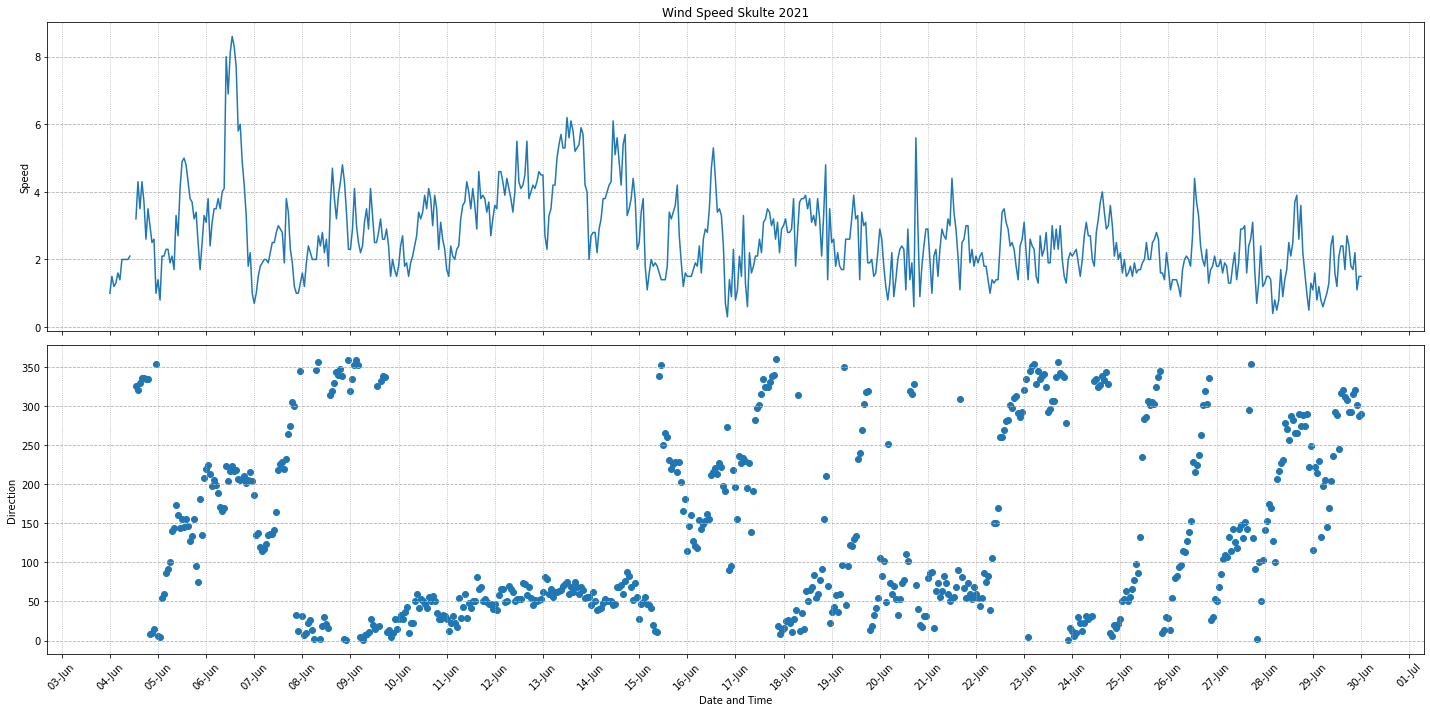

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have the 'Date_time', 'Spe', and 'Dir' columns stored in separate variables
datetimes = merged_df['Datetime']
speeds = merged_df['Speed, m/s']
directions = merged_df['Direction, deg']

# Convert 'datetimes' to datetime objects for proper plotting
datetimes = pd.to_datetime(datetimes, format='%d.%m.%Y %H:%M')

# Define the desired time period
start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2020-06-30')

# Filter the data based on the time period
mask = (datetimes >= start_date) & (datetimes <= end_date)
filtered_datetimes = datetimes[mask]
filtered_speeds = speeds[mask]
filtered_directions = directions[mask]

# Set the figure size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)  # Adjust the width and height as needed

# Plotting the first line plot
ax1.plot(filtered_datetimes, filtered_speeds)
ax1.set_ylabel('Speed')
ax1.set_title('Wind Speed Skulte 2021')

# Customize the x-axis ticks for the first plot
ax1.xaxis.set_major_locator(mdates.DayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

ax1.tick_params(axis='x', rotation=45)

# Add horizontal gridlines to the first plot
ax1.grid(axis='y', linestyle='--')
ax1.grid(axis='x', linestyle=':', which='both')

# Plotting the second scatter plot
ax2.scatter(filtered_datetimes, filtered_directions)
ax2.set_xlabel('Date and Time')
ax2.set_ylabel('Direction')

# Customize the x-axis ticks for the second plot
ax2.xaxis.set_major_locator(mdates.DayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

ax2.tick_params(axis='x', rotation=45)

# Add horizontal gridlines to the second plot
ax2.grid(axis='y', linestyle='--')
ax2.grid(axis='x', linestyle=':', which='both')

plt.tight_layout()

plt.show()



# 3.2 Vector plot

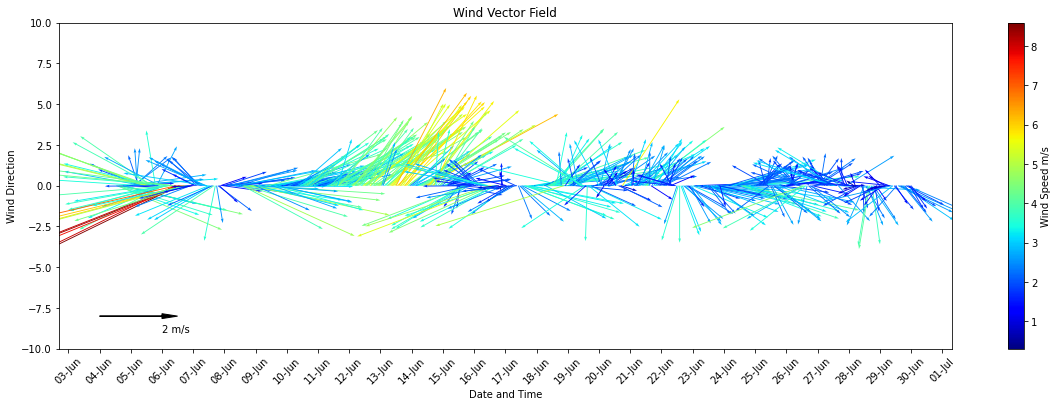

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from matplotlib.cm import ScalarMappable

datetimes = merged_df['Datetime']
speeds = merged_df['Speed, m/s']
directions = merged_df['Direction, deg']

# Convert 'datetimes' to datetime objects for proper plotting
datetimes = pd.to_datetime(datetimes, format='%d.%m.%Y %H:%M')

# Define the desired time period
start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2020-06-30')

# Filter the data based on the time period
mask = (datetimes >= start_date) & (datetimes <= end_date)
filtered_datetimes = datetimes[mask]
filtered_speeds = speeds[mask]
filtered_directions = directions[mask]

# Set the figure size
plt.figure(figsize=(20, 6))  # Adjust the width and height as needed

# Convert wind directions to radians
angles = filtered_directions * (2 * np.pi) / 360

# Normalize color_scale to range [0, 1] based on wind speed
color_scale = filtered_speeds / filtered_speeds.max()

# Plotting the vector field with colored arrows
plt.quiver(
    mdates.date2num(filtered_datetimes),
    [0] * len(filtered_datetimes),
    filtered_speeds * np.cos(angles),
    filtered_speeds * np.sin(angles),
    angles='xy',
    scale_units='xy',
    scale=1,
    width=0.001,
    color=plt.cm.jet(color_scale),  # Set the arrow color to the color scale
)

plt.xlabel('Date and Time')
plt.ylabel('Wind Direction')
plt.title('Wind Vector Field')

# Customize the x-axis ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Format the tick labels as desired

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.ylim(-10, 10)  # Adjust the y-axis limits as needed

# Add an arrow scale
arrow_scale = 2  # Set the desired scale value
arrow_label = f'{arrow_scale} m/s'

# Calculate the position of the arrow scale
scale_x = filtered_datetimes.min()
scale_y = -8

# Convert the scale_x to numeric value using date2num
scale_x_num = mdates.date2num(scale_x)

# Draw the arrow scale
plt.arrow(scale_x_num, scale_y, arrow_scale, 0, color='black', width=0.005, head_width=0.3, head_length=0.5)
plt.text(scale_x_num + arrow_scale, scale_y - 1, arrow_label)

# Create a colorbar showing the wind speed values
norm = plt.Normalize(filtered_speeds.min(), filtered_speeds.max())
cmap = plt.cm.jet
sm = ScalarMappable(norm=norm, cmap=cmap)
cbar = plt.colorbar(sm, label='Wind Speed m/s')

plt.show()


## 3.3 Wind rose

<ipython-input-18-07107543ae76>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['velocidad_x'] = filtered_df['Speed, m/s'] * np.sin(filtered_df['Direction, deg'] * np.pi / 180.0)
<ipython-input-18-07107543ae76>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['velocidad_y'] = filtered_df['Speed, m/s'] * np.cos(filtered_df['Direction, deg'] * np.pi / 180.0)


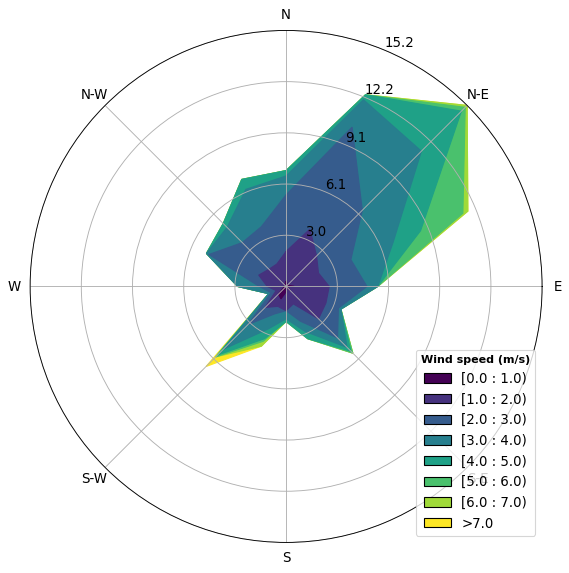

In [18]:
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from windrose import WindroseAxes
import numpy as np

# Define the desired time period
start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2020-06-30')

# Filter the data based on the time period
mask = (merged_df['Datetime'] >= start_date) & (merged_df['Datetime'] <= end_date)
filtered_df = merged_df[mask]

# Create velocity components 'velocidad_x' and 'velocidad_y'
filtered_df['velocidad_x'] = filtered_df['Speed, m/s'] * np.sin(filtered_df['Direction, deg'] * np.pi / 180.0)
filtered_df['velocidad_y'] = filtered_df['Speed, m/s'] * np.cos(filtered_df['Direction, deg'] * np.pi / 180.0)

# Create a WindroseAxes instance
ax = WindroseAxes.from_ax()

# Generate the windrose plot using 'contourf'
ax.contourf(filtered_df['Direction, deg'], filtered_df['Speed, m/s'], bins=np.arange(0, 8, 1), normed=True, cmap=viridis)

# Set the font parameters for numbers and ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.title.set_fontsize(15)
ax.title.set_fontweight('bold')
legend_font_size = 12
ax.legend(title="Wind speed (m/s)", loc="lower right", prop={'size': legend_font_size})
ax.legend_.get_title().set_fontweight('bold')

# Save the plot to a PNG file with a white background
#plt.savefig('Skulte_windrose_2020-06', facecolor='white')

# Display the windrose plot
plt.show()

# 4. Automatic ploting

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'Datetime' column to datetime objects
merged_df['Datetime'] = pd.to_datetime(merged_df['Datetime'], format='%d.%m.%Y %H:%M')

# Group the data by year and month
grouped_data = merged_df.groupby([merged_df['Datetime'].dt.year, merged_df['Datetime'].dt.month])

# Specify the path folder to save the data
save_folder_path = r'C:\Users\Miks\Dropbox\Māra dati\LVĢMC\Skulte_plots'

# Iterate over each group (year, month) and create plots
for (year, month), group in grouped_data:
    # Create a new figure and subplots for each month
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
    
    # Plotting the first line plot (speeds)
    ax1.plot(group['Datetime'], group['Speed, m/s'])
    ax1.set_ylabel('Speed, m/s')
    ax1.set_title(f'Wind Speed Skulte {year} {month:02d}')  # Format the title with leading zeros for single-digit months
    
    # Customize the x-axis ticks for the first plot
    ax1.xaxis.set_major_locator(mdates.DayLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  
    
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', linestyle='--')
    ax1.grid(axis='x', linestyle=':', which='both')
    
    # Plotting the second scatter plot (directions)
    ax2.scatter(group['Datetime'], group['Direction, deg'])
    ax2.set_xlabel('Date and Time')
    ax2.set_ylabel('Direction')
    
    # Customize the x-axis ticks for the second plot
    ax2.xaxis.set_major_locator(mdates.DayLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(axis='y', linestyle='--')
    ax2.grid(axis='x', linestyle=':', which='both')
    
    plt.tight_layout()
    
    # Save the plot to a PNG file with a white background
    filename = f"Skulte_wind_{year}_{month:02d}.png"
    save_path = os.path.join(save_folder_path, filename)
    plt.savefig(save_path, facecolor='white')
    plt.close()  # Close the figure to free up memory
